In [1]:
import numpy as np
import pandas as pd

In [2]:
X = np.array([-7, 2, -3, -11, 14, 6, 8])

In [3]:
categories = pd.cut(X, 4)
print(categories)

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]


In [4]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [5]:
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [6]:
categories.ordered

True

In [7]:
pd.cut(X, 4, retbins=True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

In [8]:
marks = np.array([70, 20, 30, 99, 40, 16, 80])
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])

In [9]:
categories

[good, poor, poor, excellent, average, poor, excellent]
Categories (4, object): [poor < average < good < excellent]

In [10]:
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

In [13]:
marks = marks.reshape(-1,1)

In [14]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [15]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [16]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [17]:
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

In [18]:
X = [[-21, 41, -14],
     [-13, 23, -31],
     [9, 30, -5],
     [0, 24, -17]]

In [21]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [22]:
enc.fit(X)
X_trans = enc.transform(X)
X_trans

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [23]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

In [24]:
enc.inverse_transform(X_trans)

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

In [25]:
df = pd.read_csv('datasets/auto_mpg_processed.csv')
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


In [26]:
X = df[['Horsepower']]
Y = df['MPG']

In [27]:
import matplotlib.pyplot as plt

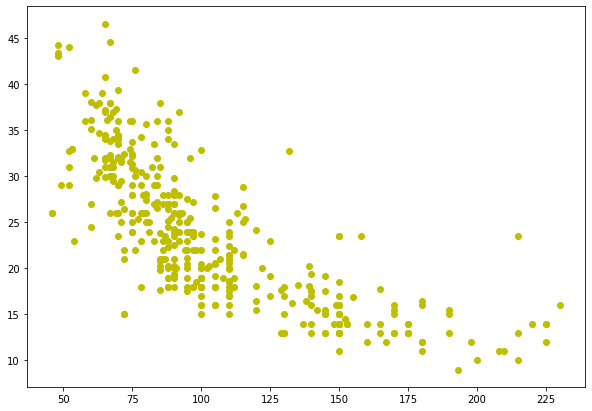

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(X, Y, 'o', c='y')
plt.show();

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
reg = LinearRegression().fit(X_train, Y_train)

In [33]:
y_pred = reg.predict(X_test)
y_pred

array([23.41109665, 23.41109665, 12.04091418, 20.16247309, 27.4718761 ,
       21.78678487, 27.4718761 , 26.17242668, 28.93375671, 24.22325254,
       26.33485786,  8.30499708, 30.23320613, 28.77132553, 25.84756432,
       17.88843659, 25.52270197, 28.12160082, 24.22325254, 30.39563731,
       25.84756432, 26.49728904, 26.98458257, 16.10169363, 29.09618789,
       26.17242668, 29.58348142, 22.59894076, 29.90834378, 19.3503172 ,
       22.2740784 , 25.52270197,  9.11715297, 24.22325254, 23.41109665,
       29.90834378, 26.49728904, 24.22325254, 26.82215139, 26.82215139,
       12.85307007, 25.84756432, 27.63430728, 28.12160082, 11.22875829,
       22.59894076, 25.52270197, 31.69508674,  5.54366705, 24.22325254,
        9.60444651, 22.59894076, 24.22325254, 23.41109665, 23.41109665,
       30.72049967, 20.97462898, 25.84756432, 16.91384952, 18.86302366,
       28.284032  , 32.01994909, 24.71054608, 20.97462898,  3.91935527,
       26.49728904,  3.10719938, 26.17242668, 26.17242668, 26.17

In [34]:
from sklearn.metrics import r2_score
print(f'R2 score: {r2_score(Y_test, y_pred)}')

R2 score: 0.5339040886859205


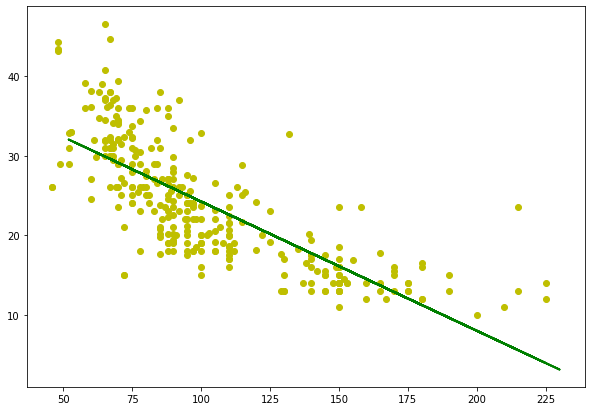

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(X_train, Y_train, 'o', c='y')
plt.plot(X_test, y_pred, linewidth=2, c='g',
            linestyle='-', label='Linear Regression')
plt.show();

In [36]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal')
x_binned = enc.fit_transform(X_train)

In [37]:
x_binned[:20]

array([[0.],
       [2.],
       [2.],
       [3.],
       [3.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.]])

In [38]:
x_test_binned = enc.transform(X_test)

In [39]:
reg = LinearRegression().fit(x_binned, Y_train)

In [40]:
y_pred = reg.predict(x_test_binned)
y_pred

array([21.15685723, 21.15685723, 15.58913162, 15.58913162, 26.72458284,
       21.15685723, 26.72458284, 26.72458284, 32.29230845, 21.15685723,
       26.72458284, 15.58913162, 32.29230845, 32.29230845, 26.72458284,
       15.58913162, 21.15685723, 26.72458284, 21.15685723, 32.29230845,
       26.72458284, 26.72458284, 26.72458284, 15.58913162, 32.29230845,
       26.72458284, 32.29230845, 21.15685723, 32.29230845, 15.58913162,
       21.15685723, 21.15685723, 15.58913162, 21.15685723, 21.15685723,
       32.29230845, 26.72458284, 21.15685723, 26.72458284, 26.72458284,
       15.58913162, 26.72458284, 26.72458284, 26.72458284, 15.58913162,
       21.15685723, 21.15685723, 32.29230845, 15.58913162, 21.15685723,
       15.58913162, 21.15685723, 21.15685723, 21.15685723, 21.15685723,
       32.29230845, 21.15685723, 26.72458284, 15.58913162, 15.58913162,
       26.72458284, 32.29230845, 21.15685723, 21.15685723, 15.58913162,
       26.72458284, 15.58913162, 26.72458284, 26.72458284, 26.72

In [41]:
r2_score(Y_test, y_pred)

0.6251912034533951

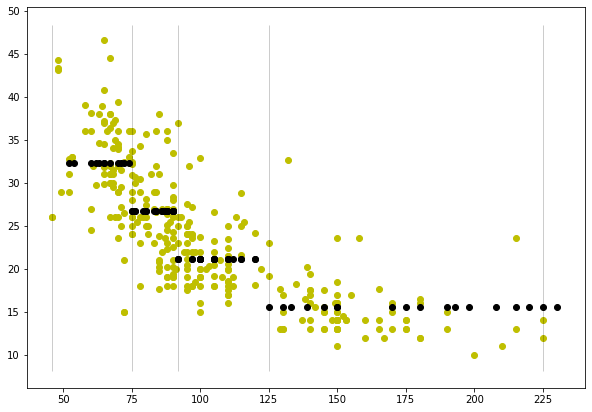

In [42]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, Y_train, c='y')
plt.scatter(X_test, y_pred, c='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
plt.show();